# Figure 2

Steady-state solutions for a range of glucose concentrations and OXPHOS capacities by chemicals.

In [1]:
using DifferentialEquations
using ModelingToolkit
using MitochondrialDynamics
import PythonPlot as plt
plt.matplotlib.rcParams["font.size"] = 14

14

In [2]:
@named sys = make_model()
@unpack GlcConst, rETC, rHL, rF1, rPDH = sys
prob = SteadyStateProblem(sys, [])

SteadyStateProblem with uType Vector{Float64}. In-place: true
u0: 9-element Vector{Float64}:
 0.057
 0.001
 0.0002
 0.092
 0.0029
 0.0087
 0.9
 0.24
 0.06

Range for two parameters

In [3]:
rGlcF1 = range(3.0, 30.0, 51)
rGlcETC = range(3.0, 30.0, 51)
rGlcHL = range(4.0, 30.0, 51)
rf1 = range(0.1, 2.0, 51)
retc = range(0.1, 2.0, 51)
rhl = range(0.1, 5.0, 51)

0.1:0.098:5.0

2D steady states

In [4]:
function solve_fig3(glc, r, k, prob, alg=DynamicSS(Rodas5()))
    newprob = remake(prob, p = [GlcConst=> glc, k => r])
    return solve(newprob, alg)
end

solsf1 = [solve_fig3(glc, r, rF1, prob) for r in rf1, glc in rGlcF1];
solsetc = [solve_fig3(glc, r, rETC, prob) for r in retc, glc in rGlcETC];
solshl = [solve_fig3(glc, r, rHL, prob) for r in rhl, glc in rGlcHL];

In [5]:
function plot_fig3(;
    figsize=(10, 10),
    cmaps=["bwr", "magma", "viridis"],
    ylabels=[
        "ATP synthase capacity (X)",
        "ETC capacity (X)",
        "Proton leak rate (X)"
    ],
    cbarlabels=["<k> (a.u.)", "ΔΨ (mV)", "T:D (ratio)"],
    xxs=(rGlcF1, rGlcETC, rGlcHL),
    xscale=5.0,
    yys=(rf1, retc, rhl),
    zs=(solsf1, solsetc, solshl),
    extremes=((1.0, 1.8), (80.0, 180.0), (0.0, 60.0))
)
    # mapping functions
    @unpack degavg, ΔΨm, ATP_c, ADP_c = sys
    fs = (s -> s[degavg], s -> s[ΔΨm * 1000] , s -> s[ATP_c / ADP_c])

    fig, axes = plt.subplots(3, 3; figsize)

    subtitle = [
        "a" "b" "c";
        "d" "e" "f";
        "g" "h" "i";
    ]

    for col in 1:3
        f = fs[col]
        cm = cmaps[col]
        cbl = cbarlabels[col]
        vmin, vmax = extremes[col]

        # lvls = LinRange(vmin, vmax, levels)
        for row in 1:3
            xx = xxs[row] ./ xscale
            yy = yys[row]
            z = zs[row]
            ax = axes[row-1, col-1]

            ylabel = ylabels[row]

            mesh = ax.pcolormesh(
                xx, yy, map(f, z);
                shading="gouraud",
                rasterized=true,
                cmap=cm,
                vmin=vmin,
                vmax=vmax
            )

            ax.set(ylabel=ylabel, xlabel="Glucose (X)")
            ax.set_title(subtitle[row, col], loc="left")

            # Arrow annotation: https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation
            if row == 1
                ax.text(5.5, 1, "Oligomycin", ha="center", va="center", rotation=-90, size=16, bbox=Dict("boxstyle" => "rarrow", "fc" => "w", "ec" => "k", "lw" => 2, "alpha" => 0.5))
            elseif row == 2
                ax.text(5.5, 1, "Rotenone", ha="center", va="center", rotation=-90, size=16, bbox=Dict("boxstyle" => "rarrow", "fc" => "w", "ec" => "k", "lw" => 2, "alpha" => 0.5))
            elseif row == 3
                ax.text(5.5, 2.5, "FCCP", ha="center", va="center", rotation=90, size=16, bbox=Dict("boxstyle" => "rarrow", "fc" => "w", "ec" => "k", "lw" => 2, "alpha" => 0.5))
            end
            cbar = fig.colorbar(mesh, ax=ax)
            cbar.ax.set_title(cbl)
        end
    end

    fig.tight_layout()
    return fig
end

plot_fig3 (generic function with 1 method)

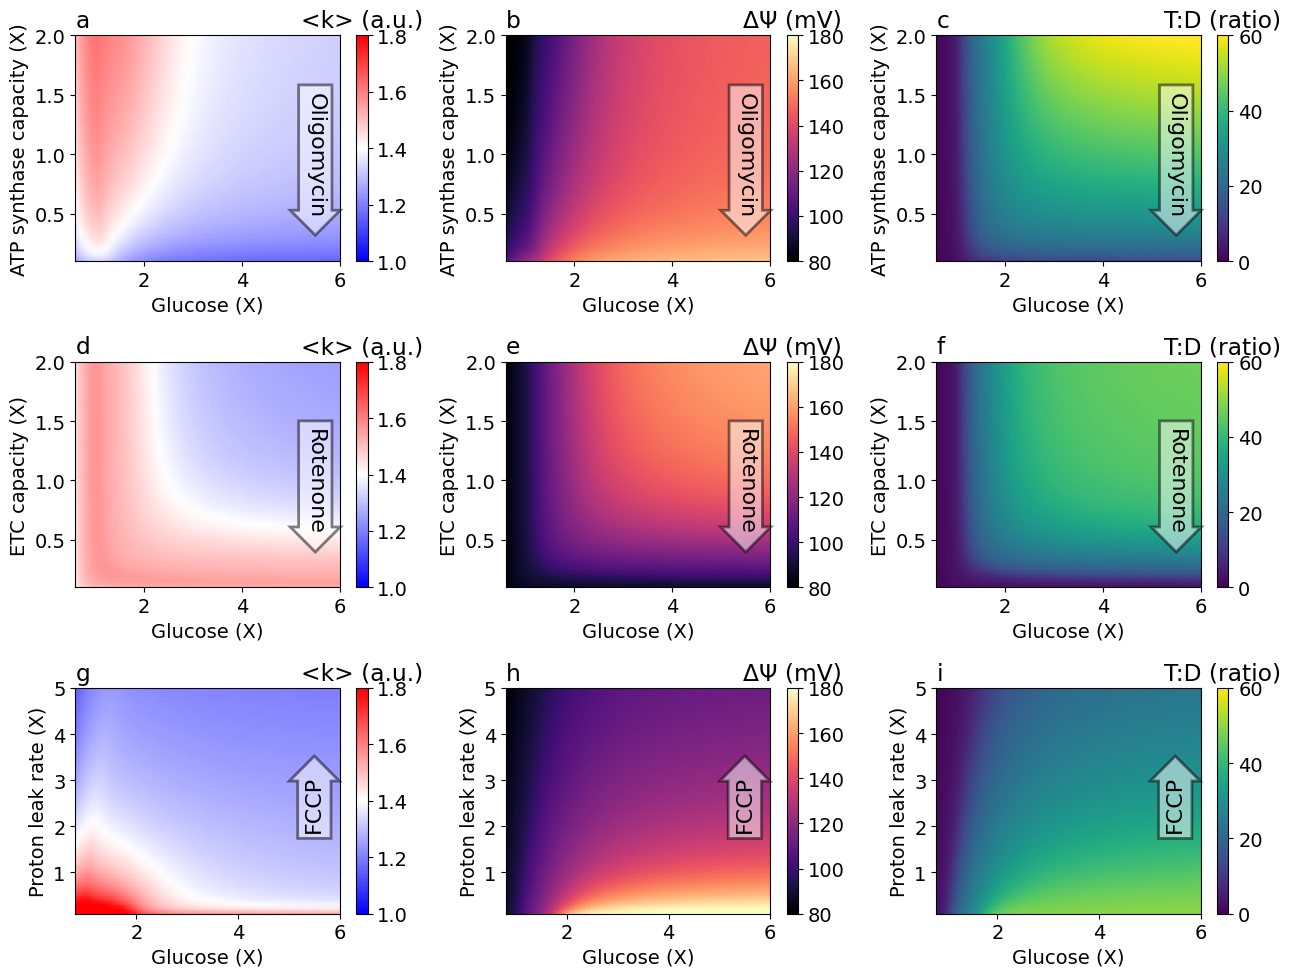

In [6]:
fig = plot_fig3(figsize=(13, 10))

Export figure

In [7]:
exportTIF(fig, "Fig2-2Dsteadystate.tif")

Python: None

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*